ETL, Analysis, and Visualization - MRTS Database

**Xinran Wang**


# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. Extract-Transform-Load](#2.-Extract-Transform-Load)
    - [2.1 The ETL Process](#2.1-The-ETL-Process)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Read the Data Using Python](#2.4-Reading-the-Data-Using-Python)
         - [2.4.1 Reading Sample Data](#2.4.1-Reading-Sample-Data)
         - [2.4.2 Reading the MRST Data](#2.4.2-Reading-the-MRST-Data)
    - [2.5 Writing an Installation Script](#2.5-Writing-an-Installation-Script)
- [3. Analysis and Visualization](#3.-Project-Description)
    - [3.1 Running Queries in MySQL Workbech](#3.1-Running-Queries-in-MySQL-Workbech)
    - [3.2 Running Queries From Python](#3.2-Running-Queries-From-Python)
    - [3.3 Explore Trends](#3.3-Explore-Trends)
    - [3.4 Explore Percentage Change](#3.4-Explore-Percentage-Change)
    - [3.5 Explore Rolling Time Windows](#3.5-Explore-Rolling-Time-Windows)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This project is designed to demonstrate a complete ETL, data analysis and data visualiztion process using the MRTS table. The data is modifed from xls file to csv file, then to MySQL database, and final result is computed on Python.

[Back to top](#Index)


## 1. Introduction

Here is the steps to complete this project.
1. Modify the original xls file, adjust and remove some of it content to make it fit a csv format. Export the modified file into csv file.
2. Import the csv file into MySQL database inside the schema create for this project, **Module 8**. Changing the data types accordingly when loading the table.
3. After the table is stored in the databse, write some queries to test the data is loaded correctly.
4.In Python environment, connect to the MySQL database and read the MRTS table, store the result into a Pandas data frame.
5. Clean the data and prepare it for data analysis and visualization.
6. Data Analysis.
7. Data Visualization including generating trends, percentage change and rolling time window.
8. Conclusion.

[Back to top](#Index)

## 2. Extract-Transform-Load

[Back to top](#Index)

### 2.1 The ETL Process

As the destinated database of this dataset is going to MySQL Workbench, I initially designed the extract method of this process to be using **_Table DataImport Wizard_** in MySQL. To do this, I removed the description cells in the _xls file_ and adjusted the line space to make the table columns and rows are shown correctly.
After modifying the _xls file_, save it as _.csv file_. 

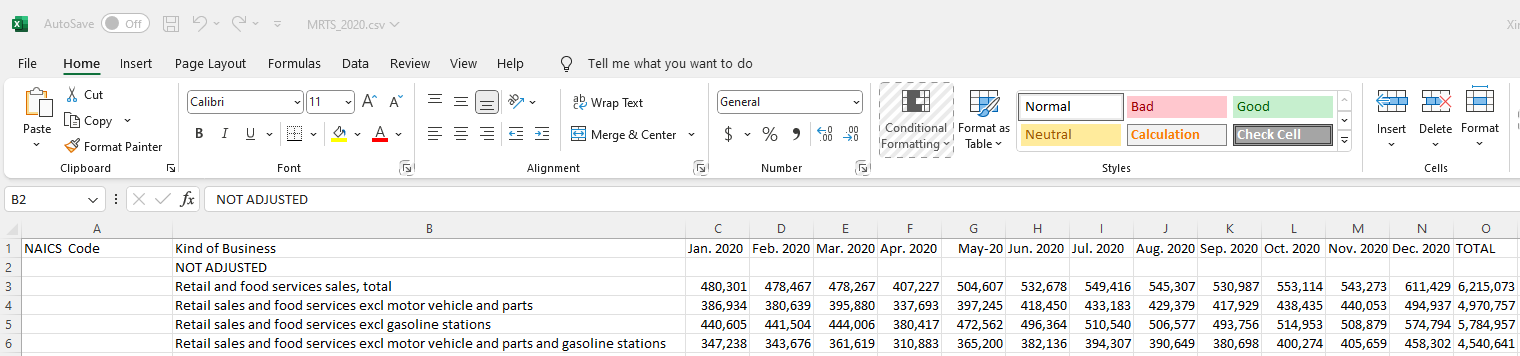

Then in the schema create in MySQL workbench, using **_Table DataImport Wizard_** to import the _csv_ file into database, following the steps as shown on the screenshots below, we see the table is imported properly in the database.

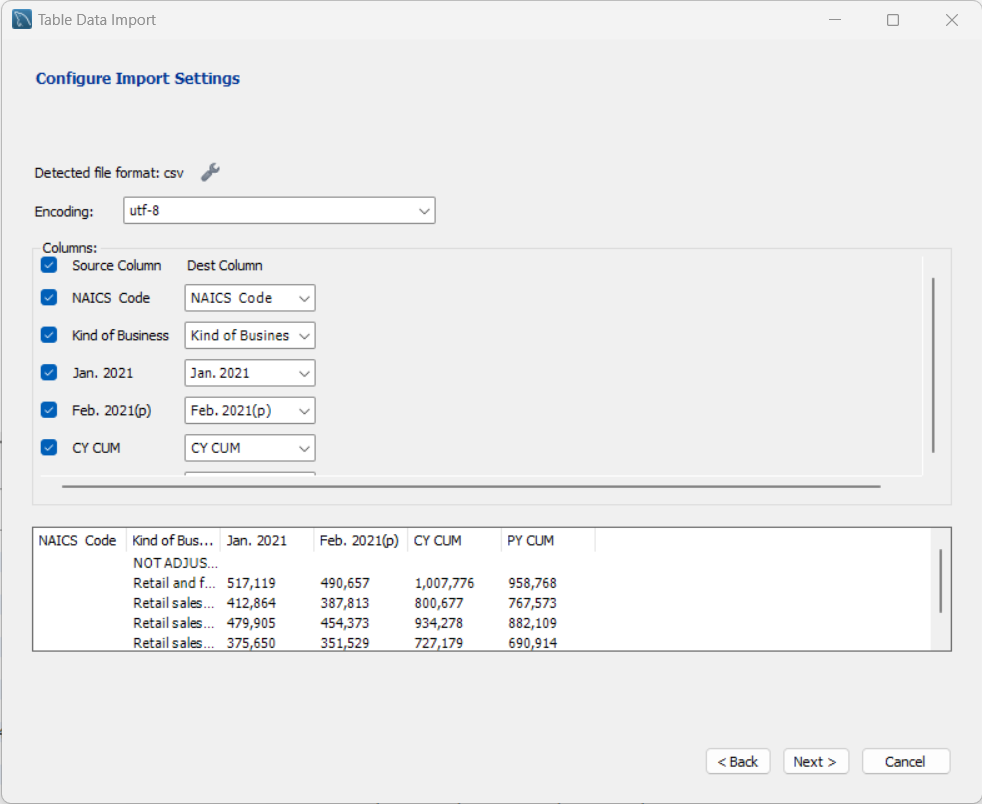

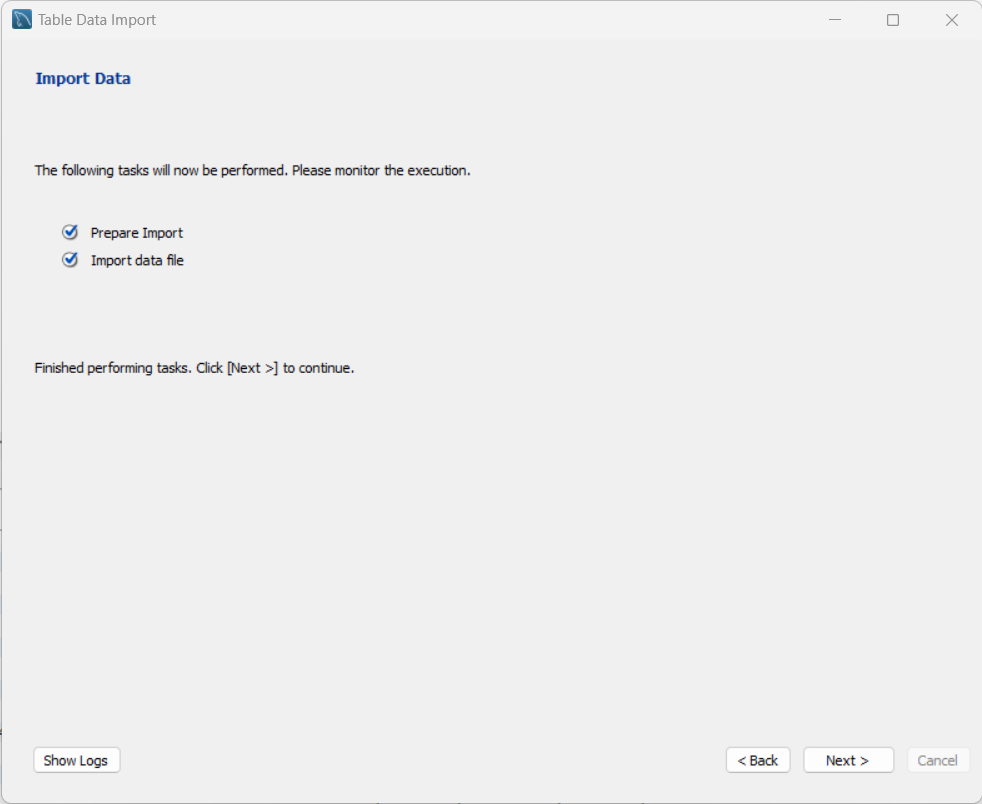

[Back to top](#Index)

### 2.2 Data Exploration


Based on the research and exploration, I will use the data from year 2020 to do this project as year 2021 data is specific and does not contain the data for the 12 months of the year. I found the following features of this table:
1. 15 columns, none of them could represent a primary key (there are null values and non integer values in NAICS Code column). Estimated sales of each month are listed as columns and their total are also given. Specific values like **(s)** exists in the column values.
2. The table should be separated into two parts: Not Adjusted and Adjusted.Adjusted part does not contain total estimated sales column and its algorithm of each month are different compared with Not Adjusted part.
3. Business Kind **GAFO** are integrated from specific NAICS Code, it should be treated separately when doing data analysis.

[Back to top](#Index)

### 2.3 Data Preparation


Besides the modifications we made previously to adjust the table to a more column-row-orientated format, I will apply the following updates in the data preapration part in Python before doing any data analysis.

1. Remove the Business kinds that only contain **(s)** value. For Business Kinds partly contain **(s)** value, replace **(s)** value with mean value of that row.Recalculate the **TOTAL** column of this row after doing the modification. Further evaluation needs to be applied to test if this update is appropriate.
2. As mentioned above, separate the table into Not Adjusted and Adjusted parts, analyze the two parts separately. The two cells cotains _Not Adjusted_ and _Adjusted_ should also be deleted as they are not considered as a row value.
3. Keep Business Kind **GAFO**, but consider it as a outlier when doing visualization.
4. Adjust the month column and other column formats to better represent a column name for analyzing in MySQL and Python. For instance, _Jan. 2020_ to _Jan_2020_

[Back to top](#Index)

### 2.4 Read the Data Using Python


1. Use the Python library _mysql.connector_ to connect to MySQL Database.    
2. Enter credentials for the database and setup connections.    
3. Use SQL query _SELECT * FROM TABLE_ to read the csv file.    
4. Create a Pandas dataframe to store the query result.    
5. Script for a error configuration if any error occuries.

[Back to top](#Index)

### 2.4.1 Reading Sample Data

The dataset used in this project is the prepared _csv file_ from the _xls file_. And the file is imported to MySQL database as described above.

In this part, I will use Python to connected to the MySQL database that stored the csv file table to read this csv file.

[Back to top](#Index)

### 2.4.2 Reading the MRTS Data


Using **mysql.connector** library to load and read the dataset. For a better data analysis purpose, store the dataset as a Pandas dataframe.

[Back to top](#Index)

### 2.5 Writing an Installation Script

In [307]:
#As the Python part begins, import the necessary libraries
import pandas as pd
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from mysql.connector import errorcode

In [308]:
# MySQL database configuration
db_config = {
    'user': 'root',
    'password': '413426Txwd!',
    'host': '127.0.0.1',
    'database': 'module8',  
}

try:
    # Connect to MySQL
    connection = mysql.connector.connect(**db_config)

    # Create a cursor object
    cursor = connection.cursor()

    # Execute a simple SELECT query
    query = "SELECT * FROM mrts_2020"
    cursor.execute(query)

    # Fetch all the rows
    rows = cursor.fetchall()

    # Get column names from the cursor description
    column_names = [desc[0] for desc in cursor.description]

    # Create a Pandas DataFrame
    df = pd.DataFrame(rows, columns=column_names)

#error configuration
except mysql.connector.Error as err:
    if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Error: Access denied. Check your username and password.")
    elif err.errno == errorcode.ER_BAD_DB_ERROR:
        print("Error: Database does not exist.")
    else:
        print(f"Error: {err}")
finally:
    # Close the cursor and connection
    if 'cursor' in locals():
        cursor.close()
    if 'connection' in locals() and connection.is_connected():
        connection.close()

df.head()

,NAICS _Code,Kind_of_Business,Jan_2020,Feb_2020,Mar_2020,Apr_2020,May_2020,Jun_2020,Jul_2020,Aug_2020,Sep_2020,Oct_2020,Nov_2020,Dec_2020,TOTAL
0,,NOT ADJUSTED,,,,,,,,,,,,,
1,,"Retail and food services sales, total","480,301","478,467","478,267","407,227","504,607","532,678","549,416","545,307","530,987","553,114","543,273","611,429","6,215,073"
2,,Retail sales and food services excl motor vehi...,"386,934","380,639","395,880","337,693","397,245","418,450","433,183","429,379","417,929","438,435","440,053","494,937","4,970,757"
3,,Retail sales and food services excl gasoline s...,"440,605","441,504","444,006","380,417","472,562","496,364","510,540","506,577","493,756","514,953","508,879","574,794","5,784,957"
4,,Retail sales and food services excl motor vehi...,"347,238","343,676","361,619","310,883","365,200","382,136","394,307","390,649","380,698","400,274","405,659","458,302","4,540,641"



[Back to top](#Index)

## 3. Analysis and Visualization

[Back to top](#Index)

### 3.1 Running Queries in MySQL Workbech

Describe which *queries* you ran against the MRTS dataset in MySQL Workbench to verify that everything worked as expected.

As the table was imported from **Table Data Import Wizard** successfully, the data structure and format is correct. Now we need to test if the values are imported correctly. Just two simple queries can used to test this.

<span style="color:red">1. Read the whole table to take a look at the data.

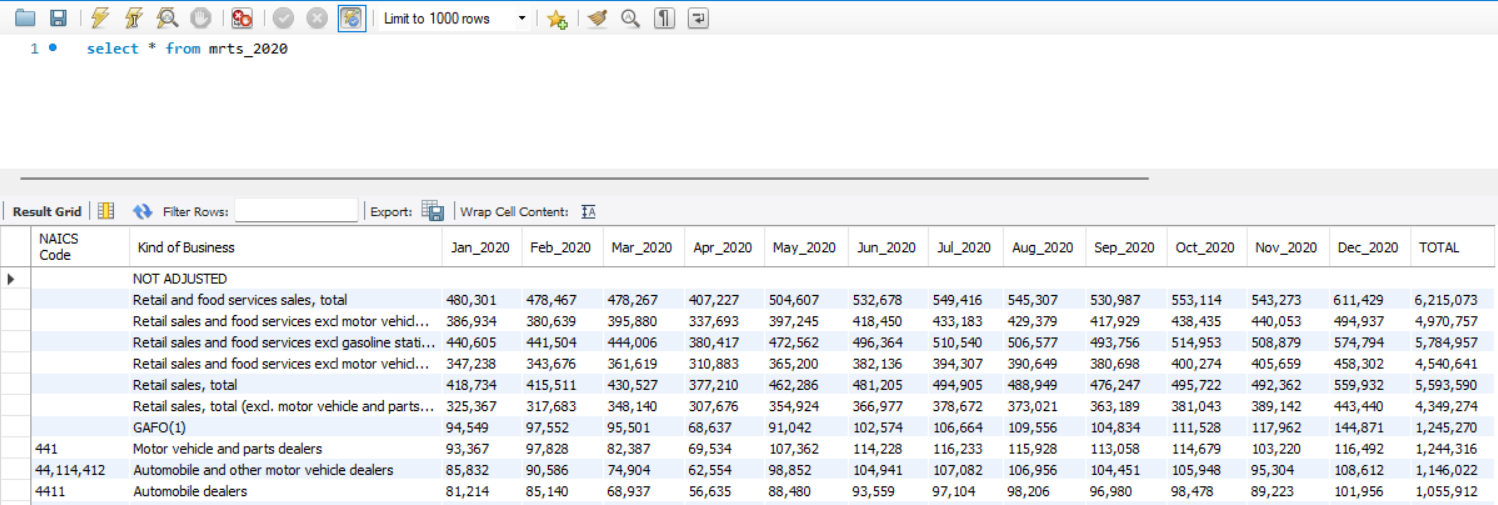

<span style="color:red">2. Summarize the 12 months sales amount to see if it is the same as the _TOTAL_ column.

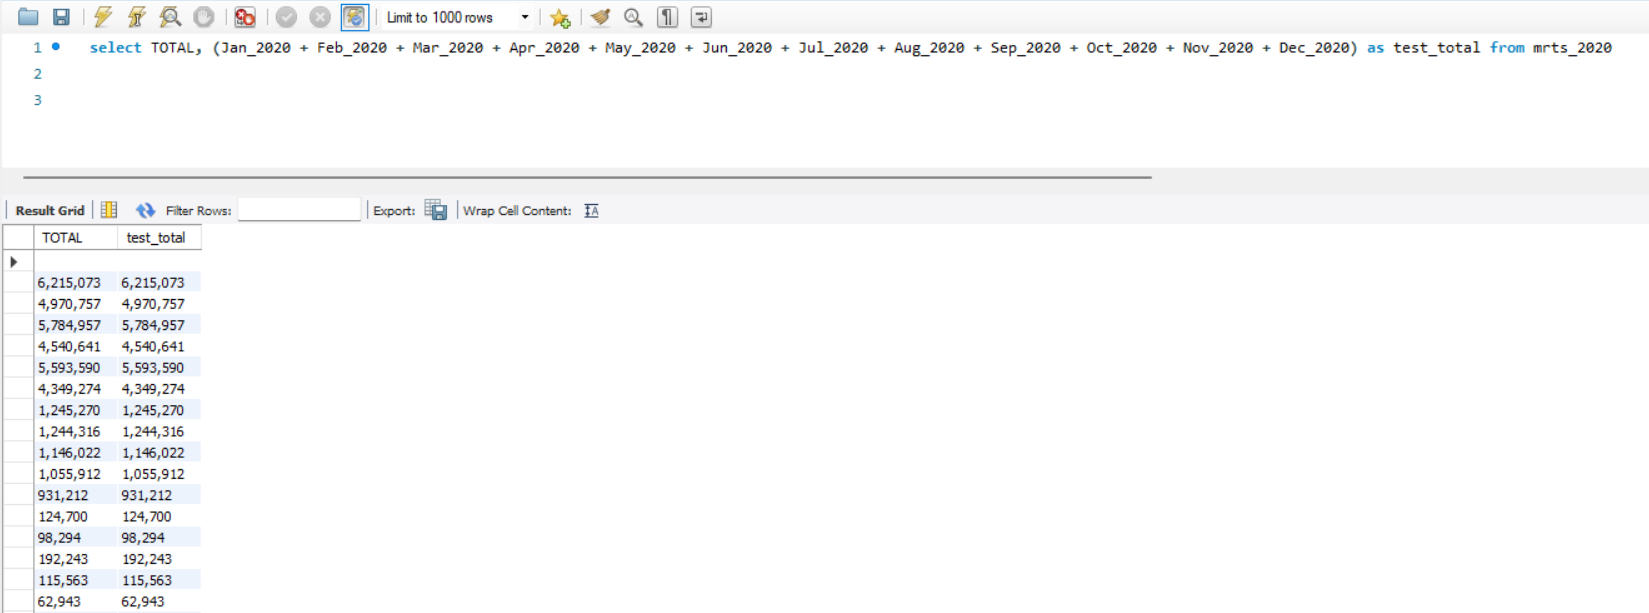

[Back to top](#Index)

### 3.2 Running Queries From Python

Recall we have the dataframe of the table defined in Python, we would need to conduct the above two result in Python.

In [309]:
#1. Show the table details
df.head(70)

,NAICS _Code,Kind_of_Business,Jan_2020,Feb_2020,Mar_2020,Apr_2020,May_2020,Jun_2020,Jul_2020,Aug_2020,Sep_2020,Oct_2020,Nov_2020,Dec_2020,TOTAL
0,,NOT ADJUSTED,,,,,,,,,,,,,
1,,"Retail and food services sales, total","480,301","478,467","478,267","407,227","504,607","532,678","549,416","545,307","530,987","553,114","543,273","611,429","6,215,073"
2,,Retail sales and food services excl motor vehi...,"386,934","380,639","395,880","337,693","397,245","418,450","433,183","429,379","417,929","438,435","440,053","494,937","4,970,757"
3,,Retail sales and food services excl gasoline s...,"440,605","441,504","444,006","380,417","472,562","496,364","510,540","506,577","493,756","514,953","508,879","574,794","5,784,957"
4,,Retail sales and food services excl motor vehi...,"347,238","343,676","361,619","310,883","365,200","382,136","394,307","390,649","380,698","400,274","405,659","458,302","4,540,641"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,"722513, 722514, 722515",Limited service eating places,"27,113","27,062","24,159","20,001","26,498","28,789","30,214","30,013","28,743","29,950","27,249","28,640","328,431"
66,,ADJUSTED(2),,,,,,,,,,,,,
67,,"Retail and food services sales, total","526,930","525,810","480,593","410,120","484,339","526,860","534,295","538,646","549,528","550,038","542,583","535,972",
68,,Retail sales and food services excl motor vehi...,"421,768","420,290","402,547","341,922","383,397","416,286","424,649","428,451","435,154","435,791","430,381","421,525",


As Pandas provides us a more rigorous scripting. Before doing the calculation, it's time to do all the data preparation mention in **2.3**.

In [310]:
#Drop rows that contains only value (S)
df_cleaned = df[~df.isin(['(S)', np.nan]).any(axis=1)]

In [311]:
#Now, for those remainning value (S) replace them with the mean value of that row
def replace_s_with_mean(row):
    numeric_values = pd.to_numeric(row, errors='coerce')  # Convert to numeric, ignore errors
    mean_value = np.nanmean(numeric_values)  # Calculate mean, ignoring NaN values
    row[row == '(S)'] = mean_value  # Replace "(S)" with the mean
    return row

# Apply the function to each row
df_cleaned = df.apply(replace_s_with_mean, axis=1)

In [312]:
#Convert the sales columns to numeric datatype
columns_to_convert = df_cleaned.columns[2:]

# Convert the selected columns to float
df_cleaned[columns_to_convert] = df_cleaned[columns_to_convert].replace({',': ''}, regex=True).apply(pd.to_numeric)

# Display the result
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAICS _Code       106 non-null    object 
 1   Kind_of_Business  106 non-null    object 
 2   Jan_2020          103 non-null    float64
 3   Feb_2020          103 non-null    float64
 4   Mar_2020          103 non-null    float64
 5   Apr_2020          103 non-null    float64
 6   May_2020          103 non-null    float64
 7   Jun_2020          103 non-null    float64
 8   Jul_2020          103 non-null    float64
 9   Aug_2020          103 non-null    float64
 10  Sep_2020          103 non-null    float64
 11  Oct_2020          103 non-null    float64
 12  Nov_2020          103 non-null    float64
 13  Dec_2020          103 non-null    float64
 14  TOTAL             59 non-null     float64
dtypes: float64(13), object(2)
memory usage: 12.6+ KB


In [313]:
# Value to be removed
value_to_remove_1 = 'NOT ADJUSTED'
value_to_remove_2= 'ADJUSTED(2)'

# Remove rows where 'Jan' column has the specified value
df_cleaned = df_cleaned[df_cleaned['Kind_of_Business'] != value_to_remove_1]
df_cleaned = df_cleaned[df_cleaned['Kind_of_Business'] != value_to_remove_2]
# Display the result
df_cleaned.head(70)

,NAICS _Code,Kind_of_Business,Jan_2020,Feb_2020,Mar_2020,Apr_2020,May_2020,Jun_2020,Jul_2020,Aug_2020,Sep_2020,Oct_2020,Nov_2020,Dec_2020,TOTAL
1,,"Retail and food services sales, total",480301.0,478467.0,478267.0,407227.0,504607.0,532678.0,549416.0,545307.0,530987.0,553114.0,543273.0,611429.0,6215073.0
2,,Retail sales and food services excl motor vehi...,386934.0,380639.0,395880.0,337693.0,397245.0,418450.0,433183.0,429379.0,417929.0,438435.0,440053.0,494937.0,4970757.0
3,,Retail sales and food services excl gasoline s...,440605.0,441504.0,444006.0,380417.0,472562.0,496364.0,510540.0,506577.0,493756.0,514953.0,508879.0,574794.0,5784957.0
4,,Retail sales and food services excl motor vehi...,347238.0,343676.0,361619.0,310883.0,365200.0,382136.0,394307.0,390649.0,380698.0,400274.0,405659.0,458302.0,4540641.0
5,,"Retail sales, total",418734.0,415511.0,430527.0,377210.0,462286.0,481205.0,494905.0,488949.0,476247.0,495722.0,492362.0,559932.0,5593590.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,,"Retail and food services sales, total",526930.0,525810.0,480593.0,410120.0,484339.0,526860.0,534295.0,538646.0,549528.0,550038.0,542583.0,535972.0,NaN
68,,Retail sales and food services excl motor vehi...,421768.0,420290.0,402547.0,341922.0,383397.0,416286.0,424649.0,428451.0,435154.0,435791.0,430381.0,421525.0,NaN
69,,Retail sales and food services excl gasoline s...,483735.0,484185.0,445986.0,383964.0,454940.0,492602.0,498131.0,502143.0,512519.0,512844.0,506110.0,496874.0,NaN
70,,Retail sales and food services excl motor vehi...,378573.0,378665.0,367940.0,315766.0,353998.0,382028.0,388485.0,391948.0,398145.0,398597.0,393908.0,382427.0,NaN


In [314]:
#Finally, separate the table into NOT ADJUSTED and ADJUSTED part, name them as df1 and df2
df1 = df_cleaned.iloc[:65]
df2 = df_cleaned.iloc[65:]
df2

,NAICS _Code,Kind_of_Business,Jan_2020,Feb_2020,Mar_2020,Apr_2020,May_2020,Jun_2020,Jul_2020,Aug_2020,Sep_2020,Oct_2020,Nov_2020,Dec_2020,TOTAL
67,,"Retail and food services sales, total",526930.0,525810.0,480593.0,410120.0,484339.0,526860.0,534295.0,538646.0,549528.0,550038.000000,542583.000000,535972.0,NaN
68,,Retail sales and food services excl motor vehi...,421768.0,420290.0,402547.0,341922.0,383397.0,416286.0,424649.0,428451.0,435154.0,435791.000000,430381.000000,421525.0,NaN
69,,Retail sales and food services excl gasoline s...,483735.0,484185.0,445986.0,383964.0,454940.0,492602.0,498131.0,502143.0,512519.0,512844.000000,506110.000000,496874.0,NaN
70,,Retail sales and food services excl motor vehi...,378573.0,378665.0,367940.0,315766.0,353998.0,382028.0,388485.0,391948.0,398145.0,398597.000000,393908.000000,382427.0,NaN
71,,"Retail sales, total",460586.0,459610.0,434467.0,380193.0,444897.0,476347.0,481627.0,483716.0,493327.0,493991.000000,488652.000000,484782.0,NaN
72,,"Retail sales, total (excl. motor vehicle and p...",355424.0,354090.0,356421.0,311995.0,343955.0,365773.0,371981.0,373521.0,378953.0,379744.000000,376450.000000,370335.0,NaN
73,,GAFO(1),110605.0,110253.0,99049.0,72279.0,89127.0,106140.0,107240.0,107116.0,112966.0,111682.000000,108932.000000,107735.0,NaN
74,441,Motor vehicle and parts dealers,105162.0,105520.0,78046.0,68198.0,100942.0,110574.0,109646.0,110195.0,114374.0,114247.000000,112202.000000,114447.0,NaN
75,"44,114,412",Automobile and other motor vehicle dealers,97095.0,97614.0,70865.0,61388.0,92558.0,101687.0,101021.0,101476.0,105827.0,105948.000000,103930.000000,106170.0,NaN
76,4413,"Automotive parts, acc., and tire stores",8067.0,7906.0,7181.0,6810.0,8384.0,8887.0,8625.0,8719.0,8547.0,8299.000000,8272.000000,8277.0,NaN


Now let's test the script of the query describing MRTS table. We can see below it has the same result as MySQL gave. Tested total and actual total are the same.

In [315]:
df1['Test_Total'] = df1[['Jan_2020', 'Feb_2020', 'Mar_2020','Apr_2020','May_2020','Jun_2020','Jul_2020','Aug_2020','Sep_2020','Oct_2020','Nov_2020','Dec_2020']].sum(axis=1)
df_test = df1.iloc[:,[-1,-2]]
df_test.head(15)

,Test_Total,TOTAL
1,6215073.0,6215073.0
2,4970757.0,4970757.0
3,5784957.0,5784957.0
4,4540641.0,4540641.0
5,5593590.0,5593590.0
6,4349274.0,4349274.0
7,1245270.0,1245270.0
8,1244316.0,1244316.0
9,1146022.0,1146022.0
10,1055912.0,1055912.0


[Back to top](#Index)

### 3.3 Explore Trends

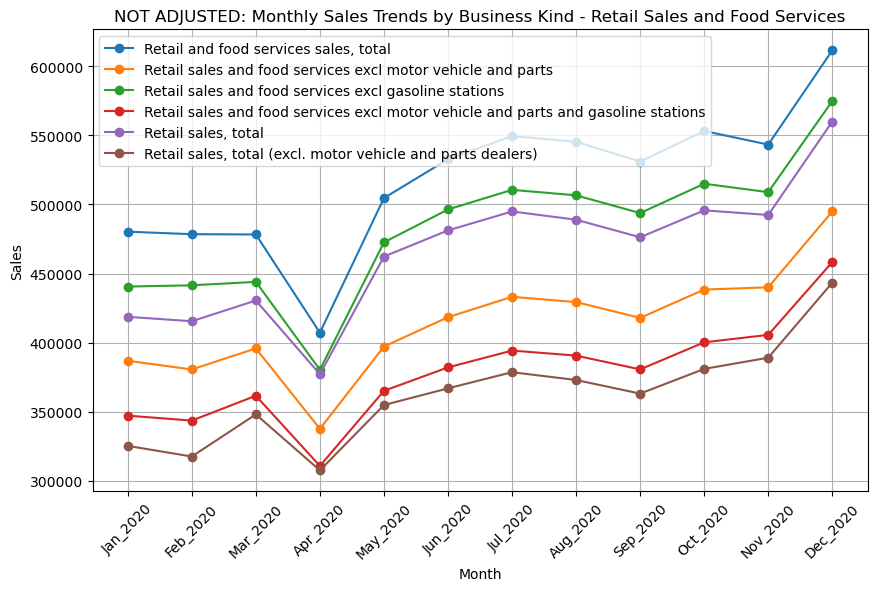

In [316]:
selected_business_kinds = ['Retail and food services sales, total','Retail sales and food services excl motor vehicle and parts','Retail sales and food services excl gasoline stations','Retail sales and food services excl motor vehicle and parts and gasoline stations','Retail sales, total','Retail sales, total (excl. motor vehicle and parts dealers)']
df_selected = df1[df1['Kind_of_Business'].isin(selected_business_kinds)]
numeric_columns = ['Jan_2020', 'Feb_2020', 'Mar_2020','Apr_2020','May_2020','Jun_2020','Jul_2020','Aug_2020','Sep_2020','Oct_2020','Nov_2020','Dec_2020']
plt.figure(figsize=(10, 6))
for index, row in df_selected.iterrows():
    plt.plot(numeric_columns, row[numeric_columns], label=row['Kind_of_Business'], marker='o')

plt.title('NOT ADJUSTED: Monthly Sales Trends by Business Kind - Retail Sales and Food Services')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

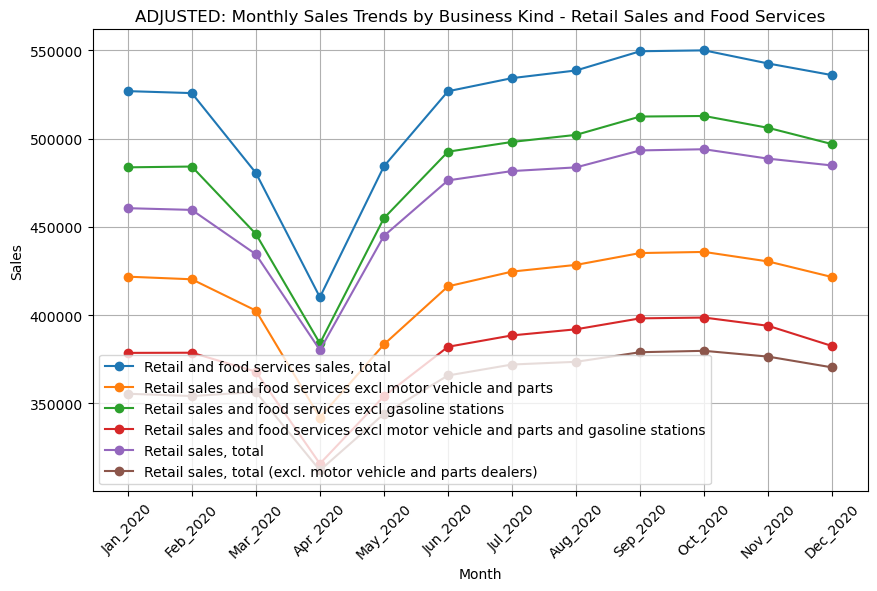

In [317]:
selected_business_kinds = ['Retail and food services sales, total','Retail sales and food services excl motor vehicle and parts','Retail sales and food services excl gasoline stations','Retail sales and food services excl motor vehicle and parts and gasoline stations','Retail sales, total','Retail sales, total (excl. motor vehicle and parts dealers)']
df_selected = df2[df2['Kind_of_Business'].isin(selected_business_kinds)]
numeric_columns = ['Jan_2020', 'Feb_2020', 'Mar_2020','Apr_2020','May_2020','Jun_2020','Jul_2020','Aug_2020','Sep_2020','Oct_2020','Nov_2020','Dec_2020']
plt.figure(figsize=(10, 6))
for index, row in df_selected.iterrows():
    plt.plot(numeric_columns, row[numeric_columns], label=row['Kind_of_Business'], marker='o')

plt.title('ADJUSTED: Monthly Sales Trends by Business Kind - Retail Sales and Food Services')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

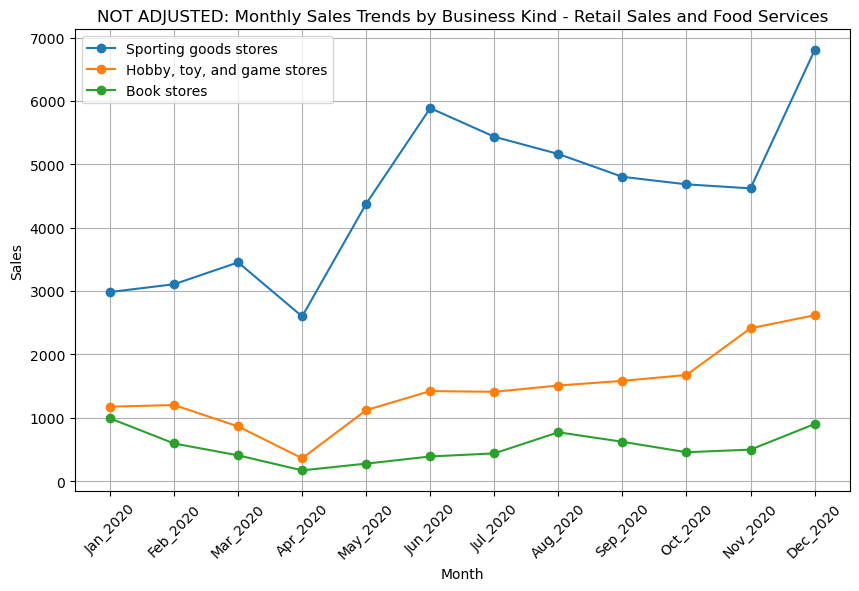

In [318]:
selected_business_kinds = ['Book stores','Sporting goods stores','Hobby, toy, and game stores']
df_selected = df1[df1['Kind_of_Business'].isin(selected_business_kinds)]
numeric_columns = ['Jan_2020', 'Feb_2020', 'Mar_2020','Apr_2020','May_2020','Jun_2020','Jul_2020','Aug_2020','Sep_2020','Oct_2020','Nov_2020','Dec_2020']
plt.figure(figsize=(10, 6))
for index, row in df_selected.iterrows():
    plt.plot(numeric_columns, row[numeric_columns], label=row['Kind_of_Business'], marker='o')

plt.title('NOT ADJUSTED: Monthly Sales Trends by Business Kind - Retail Sales and Food Services')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

* What is an economic trend and why is it considered an important measure to predict quantities, like spending patterns?

<font color="red">The economic trend here is that the sales has a significant decrease in April, the sales distribution from May to Dec is high. This is important because it indicates the spending power during this period is increasing so that strategy could be made to improve more sales.</font>

* What is the trend of the retail and food services categories? Can this data be displayed clearly or do you need to adjust some parameters to reduce extraneous details and be able to visualize a clean trend?

<font color="red">Both adjusted and not adjusted trends show that the sales of such category decrease in April and keep growing slowly from May. It is displayed clearly since previous data preparation has been made enough to ensure a proper data to be visualized.</font>

* When comparing businesses like bookstores, sporting goods stores, and hobbies, toys, and games stores, what is the highest trend of all of these options? Which one grew faster? Which one is higher? Is there a seasonal pattern? Were there any changes in 2020? Which is better, monthly or yearly?

<font color="red">Sporting Goods store has the highest sales and fastest growing trend. From Apr to Jun, it's growing rapidly.</font>

[Back to top](#Index)

### 3.4 Explore Percentage Change

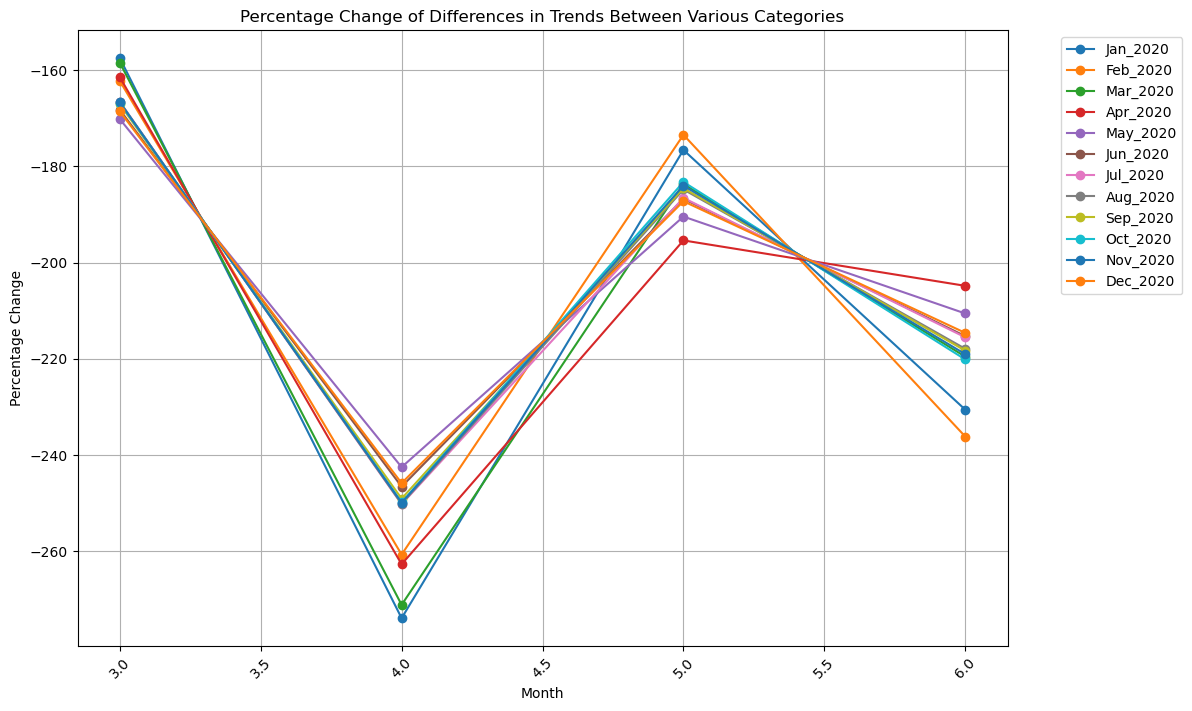

In [319]:
selected_business_kinds = ['Retail and food services sales, total',
                            'Retail sales and food services excl motor vehicle and parts',
                            'Retail sales and food services excl gasoline stations',
                            'Retail sales and food services excl motor vehicle and parts and gasoline stations',
                            'Retail sales, total',
                            'Retail sales, total (excl. motor vehicle and parts dealers)']
df_selected = df1[df1['Kind_of_Business'].isin(selected_business_kinds)]
numeric_columns = ['Jan_2020', 'Feb_2020', 'Mar_2020', 'Apr_2020', 'May_2020', 'Jun_2020', 'Jul_2020', 'Aug_2020', 'Sep_2020', 'Oct_2020', 'Nov_2020', 'Dec_2020']
df_selected[numeric_columns] = df_selected[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate the percentage change of differences in trends between various categories
df_diff_trends = df_selected[numeric_columns].diff(axis=0).pct_change() * 100

# Plotting the percentage change of differences in trends
plt.figure(figsize=(12, 8))
for column in df_diff_trends.columns:
    plt.plot(df_diff_trends.index, df_diff_trends[column], label=column, marker='o')

plt.title('Percentage Change of Differences in Trends Between Various Categories')
plt.xlabel('Month')
plt.ylabel('Percentage Change')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [320]:
selected_business_kinds = ["Men's clothing stores","Women's clothing stores"]
df_selected = df1[df1['Kind_of_Business'].isin(selected_business_kinds)]
numeric_columns = ['Jan_2020', 'Feb_2020', 'Mar_2020', 'Apr_2020', 'May_2020', 'Jun_2020', 'Jul_2020', 'Aug_2020', 'Sep_2020', 'Oct_2020', 'Nov_2020', 'Dec_2020']
df_selected[numeric_columns] = df_selected[numeric_columns].apply(pd.to_numeric, errors='coerce')
df_selected

,NAICS _Code,Kind_of_Business,Jan_2020,Feb_2020,Mar_2020,Apr_2020,May_2020,Jun_2020,Jul_2020,Aug_2020,Sep_2020,Oct_2020,Nov_2020,Dec_2020,TOTAL,Test_Total
36,44811,Men's clothing stores,599.0,615.0,302.0,86.0,155.0,303.0,405.0,379.0,401.0,4423.636364,4423.636364,604.0,NaN,12696.272727
37,44812,Women's clothing stores,2402.0,2662.0,1493.0,469.0,1099.0,2027.0,2373.0,2386.0,2494.0,2634.000000,2726.000000,3399.0,26164.0,26164.000000


* In economics, what is the percentage change and why is it considered an important measure to predict quantities like spending patterns?
<font color="red">Similiar result as the previous question, as April is going with a great descrease, the percentage falls significant during that period. And it is changing slightly with the growing sales. It's important to analyze this part because it will let us know the sales variation between each month to predict which month should make adjustment.</font>
* Consider the women's clothing and men's clothing businesses and their percentage change. How are these two businesses related? For each of the two businesses, what is the percentage of contribution to the whole and how does it change over time?
<font color="red">For all months, women's clothing sales are almost four times as men's clothing sales. Their month trends and distribution are similar</font>

[Back to top](#Index)

### 3.5 Explore Rolling Time Windows

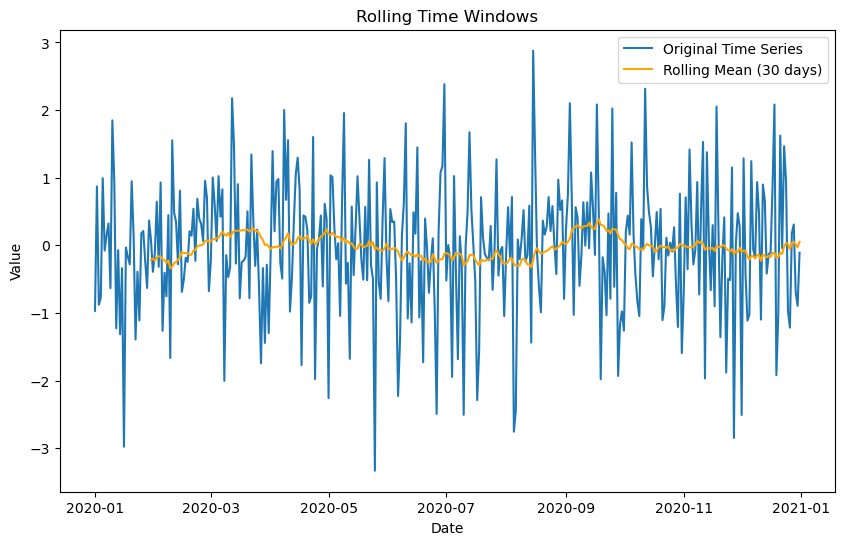

In [321]:
date_rng = pd.date_range(start='2020-01-01', end='2020-12-31', freq='D')
time_series = pd.Series(np.random.randn(len(date_rng)), index=date_rng)

# Define the rolling window size 
window_size = 30

# Calculate rolling mean
rolling_mean = time_series.rolling(window=window_size).mean()

# Plot the original time series and rolling mean
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Original Time Series')
plt.plot(rolling_mean, label=f'Rolling Mean ({window_size} days)', color='orange')

plt.title('Rolling Time Windows')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

* In economics, what is the rolling time window and why is it considered an important measure to predict quantities like spending patterns?
<font color="red">For predicting quantities like spending patterns, a rolling time window can reveal whether recent changes in spending are likely to be a short-term trend. It helps analyze more informed decisions by providing a clearer picture of the underlying economic dynamics.</font>
* Consider at least two businesses of your own from the MRTS data. Which queries did you write to analyze and produce graphs of rolling time windows for the chosen categories?
<font color="red">I used the NOT ADJUSTED data from 01-01-2020 to 01-01-2021 in MRTS table to create the rolling time windows graph. I set the window size to be 30.</font>

[Back to top](#Index)

## Conclusion

Based on the columns I analyzed, merely retail sales, food services, store sales and clothing. I found **sport good sales** and **Retail and food services sales, total** have the most spending. On the other hand, **Men's clothing** and book stores have the least spending attraction. Furhter actions could be taken on those categories to increasing the high spending kinds, as well as make adjustment to attract people to spend more on those low spending ones.